# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [32]:
# If on colab, uncomment the following lines
! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2022-11-26 13:39:24--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2022-11-26 13:39:24 (5.17 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [117]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,458,103,57,105,221,69,11,218,30,24,173,226,706,250,73,10,2,187,195
1,410,89,45,77,188,64,9,161,41,20,151,190,390,174,66,4,2,194,201
2,584,100,51,89,199,65,6,201,32,23,159,219,622,205,74,6,7,193,193
3,261,91,39,88,189,63,9,175,38,21,132,197,457,156,69,0,23,191,198
4,438,91,49,86,195,63,8,177,37,21,156,203,473,201,67,7,5,192,198
5,585,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
6,149,93,36,64,165,69,8,136,49,18,136,161,279,127,67,2,29,193,204
7,795,83,40,53,114,53,6,132,53,18,140,142,247,157,86,8,7,176,183
8,267,100,46,81,187,61,9,166,40,20,154,189,415,175,63,13,9,198,207
9,318,89,37,51,111,54,5,120,56,17,127,138,213,147,82,7,4,181,183


Methods `describe` and `info` deliver some useful information.

In [118]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.965392,93.300546,44.559199,81.355191,166.814208,61.183971,8.276867,167.615665,41.282332,20.491803,147.265938,187.191257,434.021858,173.533698,72.382514,6.229508,12.672131,188.854281,195.417122
std,247.418365,8.055624,6.193257,15.732929,32.634032,6.724291,3.461445,33.611778,7.895443,2.624009,14.469902,31.767831,179.526078,33.203273,6.845222,4.893218,8.840949,6.368883,7.701725
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,210.000000,87.000000,39.000000,70.000000,139.000000,57.000000,7.000000,145.000000,34.000000,19.000000,136.000000,166.000000,314.000000,148.000000,67.000000,2.000000,6.000000,184.000000,189.000000
50%,430.000000,92.000000,44.000000,78.000000,164.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,176.000000,358.000000,172.000000,71.000000,5.000000,11.000000,188.000000,196.000000
75%,640.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,196.000000,46.000000,23.000000,158.000000,214.000000,575.000000,196.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,99.000000,22.000000,41.000000,206.000000,211.000000


In [119]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
#As we can see from the dataset that it's a normal distribution dataset.
# So, we are using StandardScaler standardization technique to apply ML algorithms quickly and accurately.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
from sklearn import metrics
#logreg.fit(X_train_scaled,y_train)
#y_pred = logreg.predict(X_test_scaled)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Accuracy:",logreg.score(X_test_scaled, y_test))

In [122]:
param_grid = {'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-3, 3, 7)}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logreg, param_grid=param_grid, verbose=True, cv = 10, scoring='accuracy')
best_clf = clf.fit(X_train_scaled, y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Tuned Hyperparameters : {'C': 100.0, 'penalty': 'l1'}
Accuracy : 0.8088552188552189


In [123]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.72727273 0.70909091 0.67272727 0.70909091 0.61818182 0.70909091
 0.67272727 0.78181818 0.61818182 0.83333333]


F1 score of this model:  0.7588458964391801
Accuracy score of this model:  0.7542087542087542


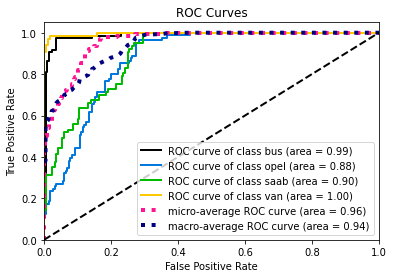

In [125]:
from sklearn.metrics import f1_score
import scikitplot as sckpl
from matplotlib import pyplot as plt
y_predicted = clf.predict(X_test_scaled)
print("F1 score of this model: ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy score of this model: ", clf.score(X_test_scaled, y_test))
    
# Plot the ROC-curve
predicted_proba = clf.predict_proba(X_test_scaled)
sckpl.metrics.plot_roc(y_test, predicted_proba)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

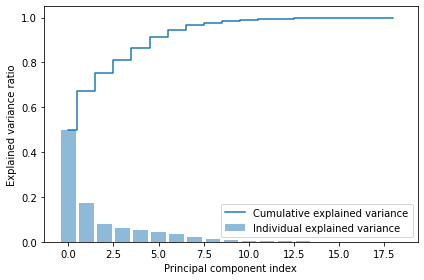

In [126]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

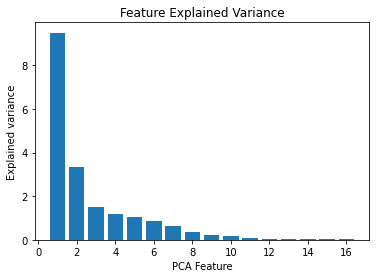

In [127]:
pca = PCA(n_components=16)
#appropriate number of components are 16 as we other feature’s variance
# is not very significant.
X_train_pca_scaled = pca.fit_transform(X_train_scaled)
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
X_test_pca_scaled = pca.fit_transform(X_test_scaled) 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [128]:
import warnings
warnings.filterwarnings('ignore')
param_grid = {'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-3, 3, 7)}
clf = GridSearchCV(logreg, param_grid=param_grid, verbose=True, cv = 10, scoring='accuracy')
clf.fit(X_train_pca_scaled, y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)
y_predicted_pca = clf.predict(X_test_pca_scaled)
print("F1 score of this model: ", f1_score(y_test, y_predicted_pca, average='macro'))

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1'}
Accuracy : 0.7997643097643098
F1 score of this model:  0.444049503242427


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [146]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

param_dict = {
    'max_depth': list(range(0, 500)),
    'criterion': ['gini', 'entropy']
}
clf = GridSearchCV(clf, param_dict, cv=5)
clf.fit(X_train_pca_scaled, y_train)
print(clf.best_params_)
print("Accuracy :",clf.best_score_)
y_predicted_dc_tree = clf.predict(X_test_pca_scaled)
print("F1 score of this model: ", f1_score(y_test, y_predicted_dc_tree, average='macro'))

{'criterion': 'entropy', 'max_depth': 145}
Accuracy : 0.6885237698081734
F1 score of this model:  0.3815845808201923


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
from sklearn.ensemble import BaggingClassifier

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

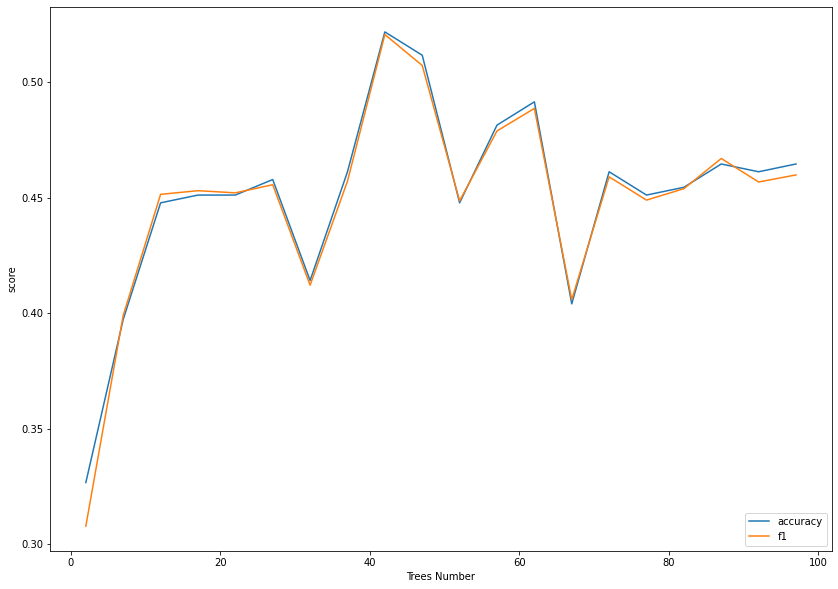

Optimal number of trees:  42 .


In [152]:
from sklearn.ensemble import RandomForestClassifier
N = np.arange(2, 100, 5)
accuracy_list = []
f1_list = []
for i in N:
  randforest_classifier = RandomForestClassifier(n_estimators=i, n_jobs = -1)
  randforest_classifier.fit(X_train_pca_scaled, y_train)
  accuracy_list.append(metrics.accuracy_score(y_test, randforest_classifier.predict(X_test_pca_scaled)))
  f1_list.append(f1_score(y_test, randforest_classifier.predict(X_test_pca_scaled), average = 'weighted'))

plt.figure(figsize=(14, 10))
plt.plot(N, accuracy_list, label = 'accuracy')
plt.plot(N, f1_list, label = "f1")
plt.xlabel("Trees Number")
plt.ylabel("score")
plt.legend(loc = 'lower right')
plt.show()
print("Optimal number of trees: ", N[np.argmax(accuracy_list)], ".")

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 